In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/phl_exoplanet_catalog_updated.csv"

In [ ]:
# Importing data
import pandas as pd
import numpy as np
dataset = pd.read_csv(path)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 117 entries, P_NAME to P_METAL_ATMOS_COMPOSITION
dtypes: float64(97), int64(4), object(16)
memory usage: 3.6+ MB


In [ ]:
print(dataset.isnull().sum())

P_NAME                            0
P_STATUS                          0
P_MASS                         2450
P_MASS_ERROR_MIN               2581
P_MASS_ERROR_MAX               2581
                               ... 
P_EQ_TEMP_EST                    70
P_ATMOS_RETENTION                17
P_ORBITAL_RAD_INTENSITY         327
P_EXPECTED_GREENHOUSE_GASES       0
P_METAL_ATMOS_COMPOSITION         0
Length: 117, dtype: int64


<Axes: >

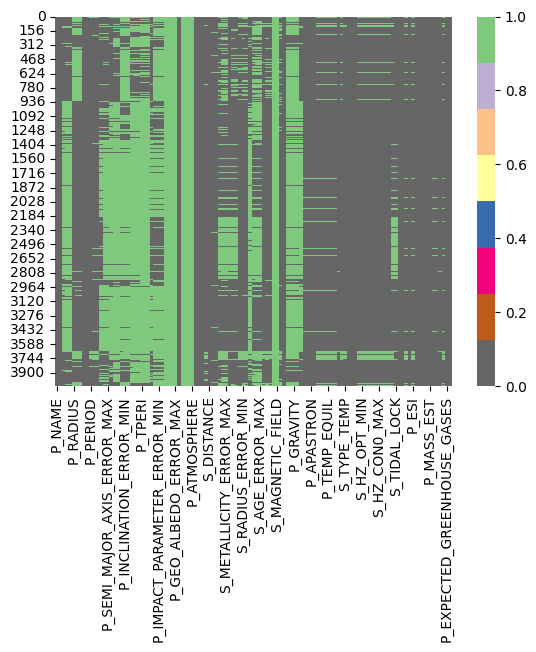

In [ ]:
# Visualizing the missing data
import seaborn as sns
sns.heatmap(dataset.isnull(), cmap='Accent_r')

In [ ]:
#Calculate the total number of examples
count = dataset.isnull().sum().sort_values(ascending=False)

#Return the fraction of a column which is filled with missing values
percent = ((dataset.isnull().sum()/dataset.isnull().count())*100).\
sort_values(ascending=False)

#Merge count and percent to display
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])

missing.head(60)

,Count,%
P_DETECTION_MASS,4048,100.000000
P_DETECTION_RADIUS,4048,100.000000
P_GEO_ALBEDO,4048,100.000000
P_ALT_NAMES,4048,100.000000
S_DISC,4048,100.000000
S_MAGNETIC_FIELD,4048,100.000000
P_ATMOSPHERE,4048,100.000000
P_GEO_ALBEDO_ERROR_MAX,4043,99.876482
P_GEO_ALBEDO_ERROR_MIN,4043,99.876482
P_TEMP_MEASURED,4043,99.876482


In [ ]:
#Drop columns containing more than 40% missing data
dataset_cols_dropped = dataset.drop(['P_DETECTION_MASS', 'P_GEO_ALBEDO',\
'S_MAGNETIC_FIELD', 'S_DISC', 'P_ATMOSPHERE', 'P_ALT_NAMES', \
'P_DETECTION_RADIUS', 'P_GEO_ALBEDO_ERROR_MIN', 'P_TEMP_MEASURED',\
'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', \
'P_TPERI', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_DENSITY', \
'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY', 'P_OMEGA', \
'P_INCLINATION_ERROR_MAX', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION',\
'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_TYPE', \
'P_ECCENTRICITY','P_IMPACT_PARAMETER_ERROR_MIN', \
'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX',\
'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 'P_SEMI_MAJOR_AXIS_ERROR_MIN',\
'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_MASS', 'S_AGE_ERROR_MAX', \
'S_AGE_ERROR_MIN', 'S_AGE', 'P_ANGULAR_DISTANCE', 'P_SEMI_MAJOR_AXIS'], \

axis = 1)

In [ ]:
dataset_cols_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       4048 non-null   object 
 1   P_STATUS                     4048 non-null   float64
 2   P_RADIUS                     3139 non-null   float64
 3   P_RADIUS_ERROR_MIN           3105 non-null   float64
 4   P_RADIUS_ERROR_MAX           3105 non-null   float64
 5   P_YEAR                       4048 non-null   int64  
 6   P_UPDATED                    4048 non-null   object 
 7   P_PERIOD                     3938 non-null   float64
 8   P_PERIOD_ERROR_MIN           3807 non-null   float64
 9   P_PERIOD_ERROR_MAX           3807 non-null   float64
 10  P_DETECTION                  4048 non-null   object 
 11  S_NAME                       4048 non-null   object 
 12  S_RA                         4048 non-null   float64
 13  S_DEC             

In [ ]:
#Print the categorical features
dataset_cols_dropped.select_dtypes(include = ['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_ALT_NAMES', 'P_TYPE',
       'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP', 'S_CONSTELLATION',
       'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG',
       'P_EXPECTED_GREENHOUSE_GASES', 'P_METAL_ATMOS_COMPOSITION'],
      dtype='object')

In [ ]:
#Single the missing data out - categorical features

#Put the categorial columns in the object_cols
object_cols = dataset_cols_dropped.select_dtypes(include = ['object'])

#Print the percentage of each column which belongs to the missing data
count = object_cols.isnull().sum().sort_values(ascending = False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*\
100).sort_values(ascending = False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])
missing.head(13)

,Count,%
P_TYPE_TEMP,327,8.078063
S_TYPE_TEMP,136,3.359684
P_TYPE,17,0.419960
P_NAME,0,0.000000
P_UPDATED,0,0.000000
P_DETECTION,0,0.000000
S_NAME,0,0.000000
S_ALT_NAMES,0,0.000000
S_RA_T,0,0.000000
S_DEC_T,0,0.000000


In [ ]:
#Fill in the missing data in categorical columns using mode

dataset_cols_dropped['P_TYPE_TEMP'] = dataset_cols_dropped['P_TYPE_TEMP']\
.fillna(dataset_cols_dropped['P_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['S_TYPE_TEMP'] = dataset_cols_dropped['S_TYPE_TEMP'].\
fillna(dataset_cols_dropped['S_TYPE_TEMP'].mode()[0])
dataset_cols_dropped['P_TYPE'] = dataset_cols_dropped['P_TYPE'].fillna\
(dataset_cols_dropped['P_TYPE'].mode()[0])

In [ ]:
object_cols = dataset_cols_dropped.select_dtypes(include = ['object'])

count = object_cols.isnull().sum().sort_values(ascending = False)
percent = ((object_cols.isnull().sum()/object_cols.isnull().count())*\
100).sort_values(ascending = False)
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])
missing.head(13)

,Count,%
P_NAME,0,0.0
P_UPDATED,0,0.0
P_DETECTION,0,0.0
S_NAME,0,0.0
S_ALT_NAMES,0,0.0
P_TYPE,0,0.0
S_TYPE_TEMP,0,0.0
S_RA_T,0,0.0
S_DEC_T,0,0.0
P_TYPE_TEMP,0,0.0


In [ ]:
#Convert categorical values to numeric values
from sklearn.preprocessing import LabelEncoder

#Define a dictionaryfor encoded labels
encoders = {}

#Encode each member of encoders dictionary
for col in dataset_cols_dropped.select_dtypes(include = ['object']).columns:
    encoders[col] = LabelEncoder()
    #Fit the encoded labels into dataset
    dataset_cols_dropped[col] = encoders[col].fit_transform(dataset_cols_dropped[col])

In [ ]:
#Impute in the missing data with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Deep copy current dataset into Mice_temp_data
imputed_data = dataset_cols_dropped.copy(deep = True)

#Set the estimator to estimate features based on other features
mice_imputer = IterativeImputer()

#Fit-transform the imputed columns in the dataset
imputed_data.iloc[:, :] = mice_imputer.fit_transform(dataset_cols_dropped)

imputed_data.head(6)

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_EQ_TEMP_EST,P_ATMOS_RETENTION,P_ORBITAL_RAD_INTENSITY,P_EXPECTED_GREENHOUSE_GASES,P_METAL_ATMOS_COMPOSITION
0,0,3.0,4.798394,8.416081,-1.802103,2007,0,326.03000,-0.32,0.32,...,24,5,12.082709,6165.86330,1.29,244.765352,22.589925,98.279430,1,0
1,1,3.0,4.798394,8.416081,-1.802103,2009,146,516.21997,-3.20,3.20,...,83,42,12.229641,4684.78480,1.53,224.749679,19.572124,107.007108,1,0
2,2,3.0,4.798394,8.416081,-1.802103,2008,0,185.84000,-0.23,0.23,...,0,2,12.848516,1525.57440,0.83,305.144643,10.896580,84.446428,1,0
3,3,3.0,4.798394,8.416081,-1.802103,2002,146,1773.40000,-2.50,2.50,...,39,34,12.865261,1481.07850,2.93,162.409334,10.729506,0.073288,1,1
4,4,3.0,4.798394,8.416081,-1.802103,1996,146,798.50000,-1.00,1.00,...,30,75,13.421749,565.73385,1.66,215.769846,6.492344,0.453838,0,1
5,5,3.0,4.798394,8.416081,-1.802103,2008,0,993.30000,-3.20,3.20,...,31,22,12.424038,3273.62840,2.60,172.408281,16.232421,5.885025,1,0


In [ ]:
#Print the number of missing values in Mice_temp_data
imputed_data.isna().sum(axis = 0)

,0
P_NAME,0
P_STATUS,0
P_RADIUS,0
P_RADIUS_ERROR_MIN,0
P_RADIUS_ERROR_MAX,0
...,...
P_EQ_TEMP_EST,0
P_ATMOS_RETENTION,0
P_ORBITAL_RAD_INTENSITY,0
P_EXPECTED_GREENHOUSE_GASES,0


In [ ]:
#Class distribution before sampling
from collections import Counter
counter_ = Counter(imputed_data['P_HABITABLE'])
for class_label_, example_num_ in counter_.items():
    percentage_ = example_num_ / len(imputed_data['P_HABITABLE']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label_, example_num_, percentage_))

Class=0, n=3993 (98.641%)
Class=2, n=34 (0.840%)
Class=1, n=21 (0.519%)


In [ ]:
#Resolve the imbalance
from imblearn.combine import SMOTEENN

#Split the dataset
X, y = imputed_data.drop(['P_HABITABLE'], axis = 1), imputed_data.P_HABITABLE

#Apply sampling method and fit the resampled into data
smt = SMOTEENN(random_state=0)
X, y = smt.fit_resample(X, y)

#The distribution after applying SMOTEENN
from collections import Counter
counter = Counter(y)
for class_label, example_num in counter.items():
    percentage = example_num / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (class_label, example_num, percentage))

Class=0, n=3858 (33.003%)
Class=1, n=3993 (34.157%)
Class=2, n=3839 (32.840%)


In [ ]:
#concatenate X and y into a new dataset
sampled_data = X
sampled_data['P_HABITABLE'] = y

In [ ]:
sampled_data.shape

(11690, 76)

In [ ]:
#Correlation Analysis
correlation_mat = sampled_data.corr().abs()
#print (correlation_mat)

<Axes: >

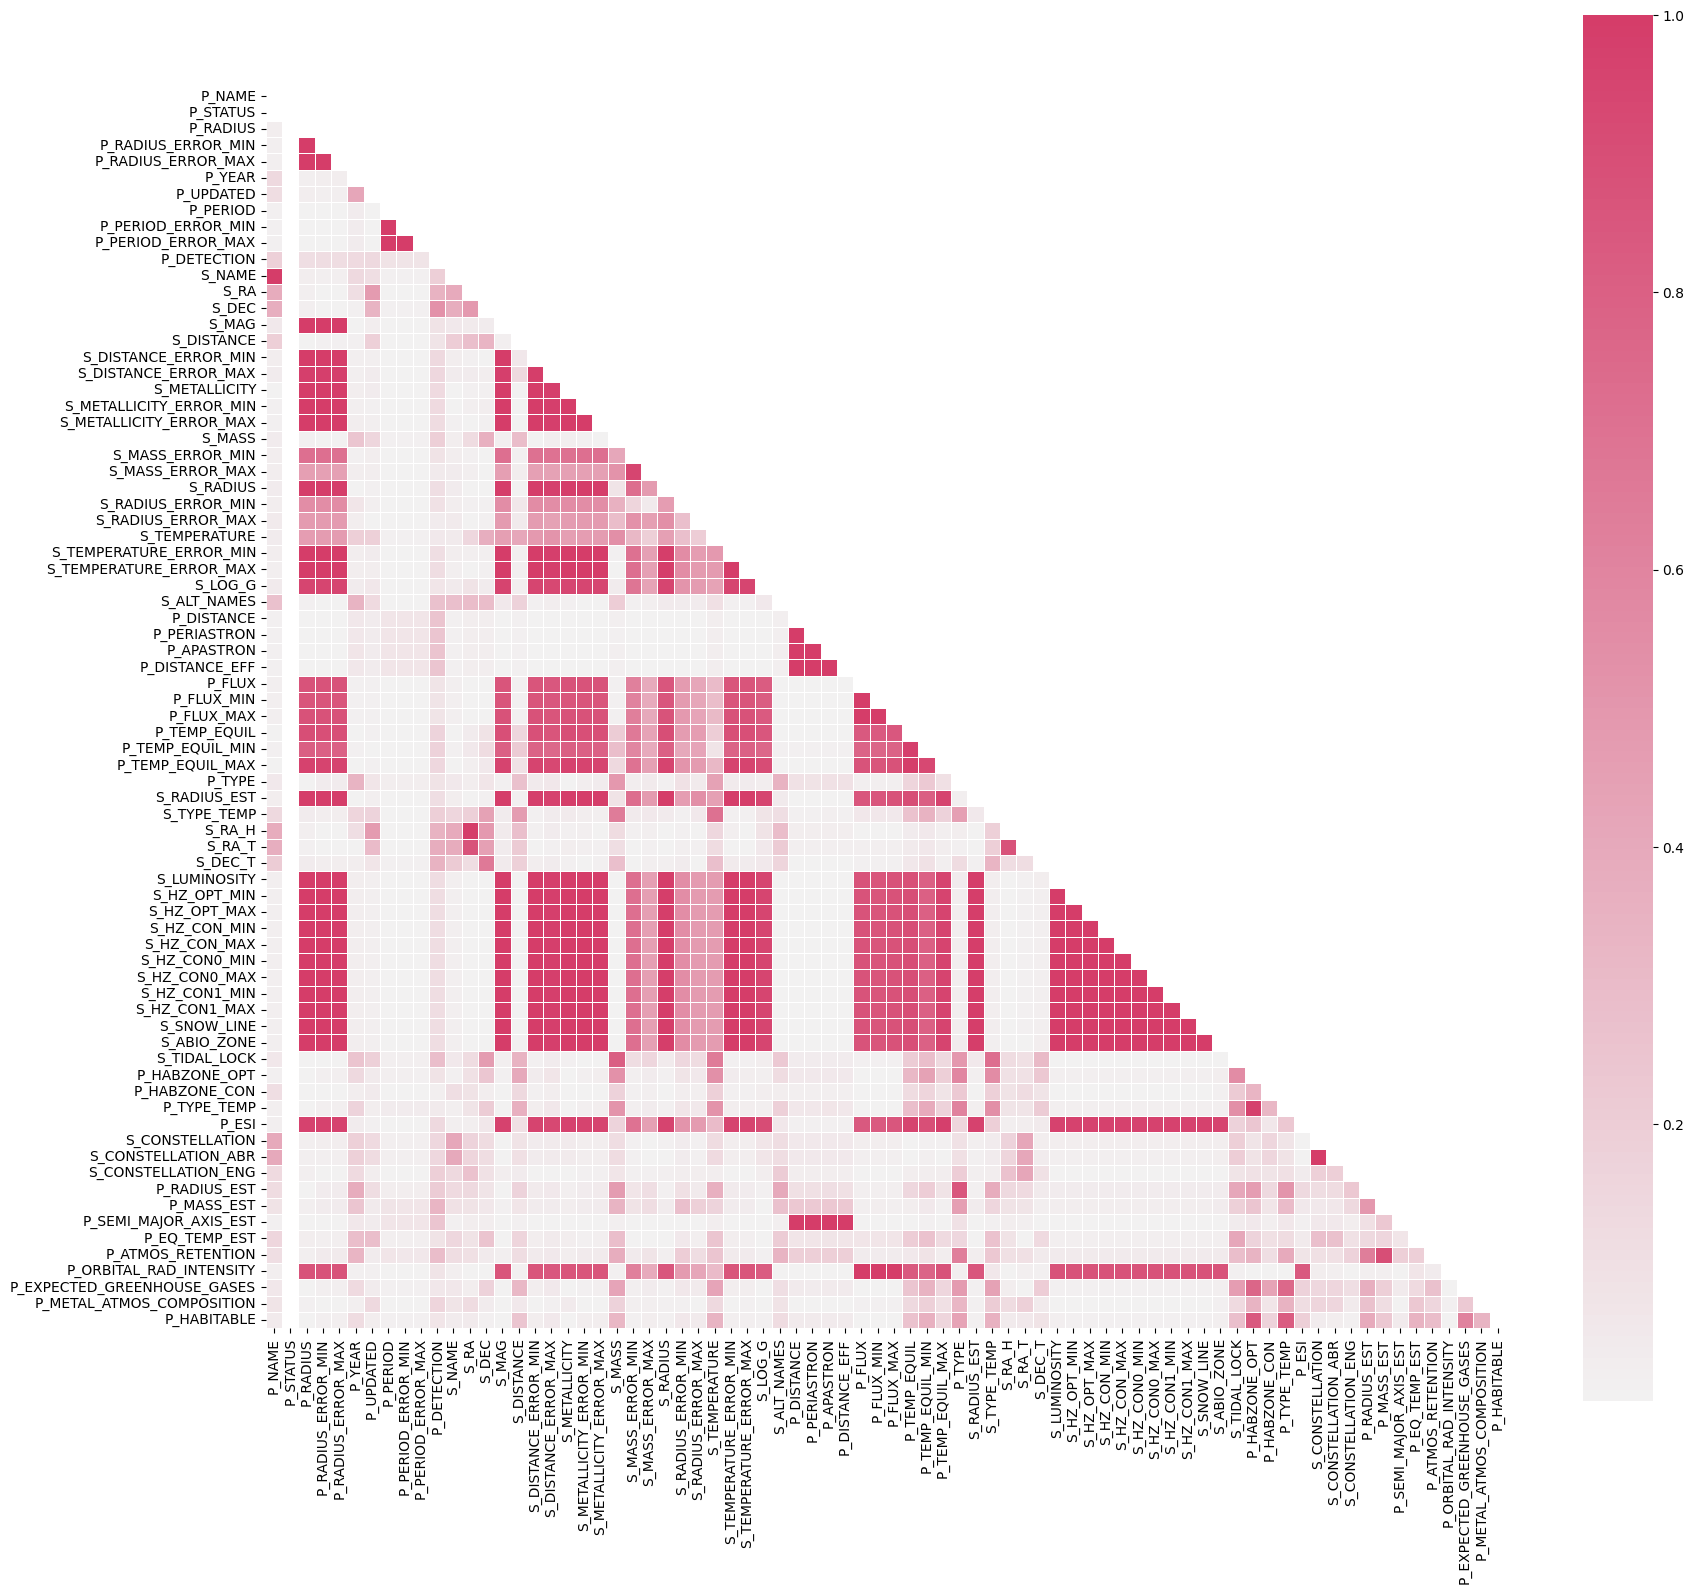

In [ ]:
#Plot the correlation matrix
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(correlation_mat, dtype = np.bool_))
f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(255, 0, as_cmap = True)
sns.heatmap(correlation_mat, mask = mask, cmap = cmap,\
vmax = None,center = 0, square = True, annot = False, \
linewidths = .5, cbar_kws = {"shrink": 0.9})

In [ ]:
#Return the dimensions of the correlation_mat using shape()
#Return the upper triangle using np.triu
#Convert ones and zeros to boolean falses and trues using astype(np.bool_)
#Use where() to return those indices where values exist
upper_triangle = correlation_mat.where(np.triu(np.ones\
(correlation_mat.shape),k = 1).astype(np.bool_))

#Set up an array of the columns to be dropped (correlation greater than 95%)
to_drop = [column for column in upper_triangle.columns if \
any(upper_triangle[column] > .95)]

#Print the list of the columns to be dropped
print(to_drop)

['P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_TEMPERATURE_ERROR_MIN', 'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 'S_ABIO_ZONE', 'P_TYPE_TEMP', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST', 'P_ORBITAL_RAD_INTENSITY']


In [ ]:
#Drop the columns with correlation greater than 95%
preprocessed_data = sampled_data.drop(['P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX',\
'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_NAME', 'S_MAG', 'S_DISTANCE_ERROR_MIN',\
'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN',\
'S_METALLICITY_ERROR_MAX', 'S_RADIUS', 'S_TEMPERATURE_ERROR_MIN',\
'S_TEMPERATURE_ERROR_MAX', 'S_LOG_G', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF',\
'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 'S_RADIUS_EST',\
'S_RA_H', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX',\
'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE',\
'S_ABIO_ZONE', 'P_TYPE_TEMP', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST','P_ORBITAL_RAD_INTENSITY'], axis = 1)
preprocessed_data.head()

#preprocessed_data.shape

,P_NAME,P_STATUS,P_RADIUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_RA,S_DEC,S_DISTANCE,...,P_HABZONE_CON,S_CONSTELLATION,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_EQ_TEMP_EST,P_ATMOS_RETENTION,P_EXPECTED_GREENHOUSE_GASES,P_METAL_ATMOS_COMPOSITION,P_HABITABLE
0,0,3.0,4.798394,2007,0,326.03000,7,185.17928,17.792868,93.37,...,0,24,5,12.082709,6165.86330,244.765352,22.589925,1,0,0
1,1,3.0,4.798394,2009,146,516.21997,7,229.27454,71.823898,125.72,...,0,83,42,12.229641,4684.78480,224.749679,19.572124,1,0,0
2,2,3.0,4.798394,2008,0,185.84000,7,352.82257,39.236198,75.59,...,0,0,2,12.848516,1525.57440,305.144643,10.896580,1,0,0
3,3,3.0,4.798394,2002,146,1773.40000,7,242.60130,43.817646,17.94,...,0,39,34,12.865261,1481.07850,162.409334,10.729506,1,1,0
4,4,3.0,4.798394,1996,146,798.50000,7,295.46655,50.517525,21.15,...,1,30,75,13.421749,565.73385,215.769846,6.492344,0,1,0


In [ ]:
#Feature Selection
#Split dataset into feature matrix and target tuple
feature_mat = preprocessed_data.drop('P_HABITABLE', axis = 1)
target = preprocessed_data['P_HABITABLE']

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#Use split data: feature_mat and target
estimator = rf(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status)

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(rf(n_estimators = 1000, random_state = 0).fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False False False False False  True False
 False False False  True False False  True  True  True False False False
 False  True False False False  True  True False  True  True False]
['S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'P_HABZONE_OPT', 'P_RADIUS_EST', 'P_MASS_EST', 'P_ATMOS_RETENTION', 'P_EXPECTED_GREENHOUSE_GASES']
[0.0119568  0.         0.00985933 0.00154983 0.00079541 0.02849554
 0.0044198  0.00206856 0.00490349 0.02832974 0.04114686 0.00563071
 0.00985382 0.0043879  0.00306117 0.04147313 0.00119633 0.01694267
 0.12270069 0.10964763 0.11679126 0.0081912  0.00167769 0.00203726
 0.01822991 0.11716387 0.00022299 0.00424999 0.00116414 0.07374684
 0.07851546 0.01909355 0.07514653 0.03454989 0.00080003]


In [ ]:
#Feature Selection using AdaBoost
from sklearn.ensemble import AdaBoostRegressor as Ada

#Use split data: feature_mat and target
estimator = Ada(random_state = 0, n_estimators = 50)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status)

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [ True False False False False  True False False False False False False
 False False False  True False False  True  True  True False False False
 False  True False False False False False False  True False False]
['P_NAME', 'P_PERIOD', 'S_TEMPERATURE', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'P_HABZONE_OPT', 'P_ATMOS_RETENTION']
[4.02693585e-02 0.00000000e+00 1.05248478e-02 0.00000000e+00
 0.00000000e+00 3.09796204e-02 1.04474963e-05 5.04650205e-03
 1.36347385e-03 7.67243198e-03 4.44731462e-04 2.25727972e-03
 0.00000000e+00 2.30884279e-03 0.00000000e+00 5.02616704e-02
 5.30062355e-04 3.43473445e-05 1.11448650e-01 6.94438161e-02
 3.85941505e-01 0.00000000e+00 4.63030336e-03 0.00000000e+00
 0.00000000e+00 1.88988967e-01 0.00000000e+00 8.31155474e-03
 0.00000000e+00 6.34267959e-03 1.34936844e-02 1.88872179e-02
 4.08080049e-02 0.00000000e+00 0.00000000e+00]


In [ ]:
del features
del estimator
del selector
del status

In [ ]:
#Feature Selection using ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier as et

#Use split data: feature_mat and target
estimator = et(n_estimators = 1000, random_state = 0)
selector = SelectFromModel(estimator)
selector.fit(feature_mat, target)
#Display which columns are selected
status = selector.get_support()
print("Status: ", status)

#Display selected column list
features = feature_mat.loc[:, status].columns.tolist()
print(features)

#Disply the importances
print(estimator.fit(feature_mat, target).feature_importances_)

Status:  [False False False False False False  True False False False False False
 False False False False False False False  True  True False False False
  True  True False False False  True False False False  True False]
['P_DETECTION', 'P_TEMP_EQUIL', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_RADIUS_EST', 'P_EXPECTED_GREENHOUSE_GASES']
[0.02629992 0.         0.0198604  0.00450749 0.00702553 0.00818225
 0.03012196 0.00981776 0.0187559  0.01704365 0.0271062  0.00524623
 0.00714297 0.00606388 0.00516214 0.02274559 0.00728619 0.00820018
 0.01440705 0.0285835  0.14404799 0.02634232 0.01007495 0.00938114
 0.03779898 0.23197583 0.01448896 0.01397001 0.00913483 0.03584572
 0.02420963 0.02796054 0.02367096 0.10042481 0.01711455]


In [ ]:
del feature_mat
del target
del X
del y

In [ ]:
#Modeling
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

#The feature_mat has to consist of only the features
#we have selected in Feature Selection phase
feature_mat = preprocessed_data[['P_PERIOD', 'P_FLUX', 'P_TEMP_EQUIL','P_TYPE', 'P_HABZONE_OPT','P_RADIUS_EST', 'P_MASS_EST', 'S_TYPE_TEMP','P_EQ_TEMP_EST','P_ATMOS_RETENTION']]

#The target column to test with
target = preprocessed_data['P_HABITABLE']

#Split the feature_mat and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_mat, target,\
test_size = 0.33, random_state = 42)

print(f"X_train dimentions: {X_train.shape}")
print(f"X_test dimentions: {X_test.shape}")
print(f"y_train dimentions: {y_train.shape}")
print(f"y_test dimentions: {y_test.shape}")

X_train dimentions: (7832, 10)
X_test dimentions: (3858, 10)
y_train dimentions: (7832,)
y_test dimentions: (3858,)


In [ ]:
######################################
######## MODELING
######################################

In [ ]:
#Normalize the training set
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Multi-class classification
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#Find the best parameters for Decision Tree using GridSearchCV
#Hyperparameters' range
param_grid = {'max_depth': np.arange(2, 10, 1),
              'max_leaf_nodes': np.arange(2, 100, 10),
              'random_state': [0, 1, 2, 3, 4, 5],
              'splitter': ['best', 'random']}

#Conduct the Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid = param_grid,
                           refit = True, verbose = 0)
#Fit the dataset
grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 4, 'max_leaf_nodes': 12, 'random_state': 0, 'splitter': 'best'}


In [ ]:
#Confusion Matrix plotting function

from sklearn.metrics import confusion_matrix

def plot_confusion_mat(ytest, ypred):
    #Create  a confusion matrix, which compares the y_test and prediction made
    conf_mat = confusion_matrix(ytest, ypred)

    #Create a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    #Assign corresponding names to labels
    confusion_mat_df = pd.DataFrame(conf_mat,
                         index = ['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'],
                         columns = ['Inhabitable', 'Consevatively Habitable','Optimistically Habitable'])

    #Plot the confusion matrix
    plt.figure(figsize = (5,4))
    sns.heatmap(confusion_mat_df, annot = True)
    plt.title('Habitability Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

    return conf_mat

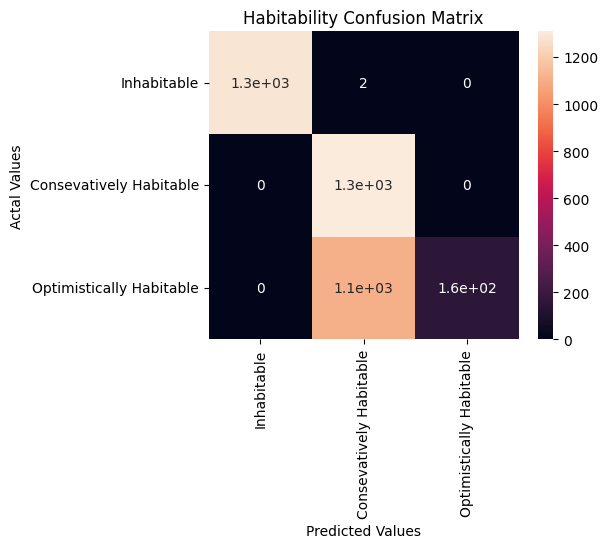

Decision Tree classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       0.54      1.00      0.70      1309
           2       1.00      0.12      0.22      1263

    accuracy                           0.71      3858
   macro avg       0.85      0.71      0.64      3858
weighted avg       0.84      0.71      0.64      3858



In [ ]:
#Decision Tree - Classification

import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
dtree_model = DecisionTreeClassifier(splitter = 'best',
                                     max_depth = 4,
                                     random_state = 0,
                                     max_leaf_nodes = 12).fit(X_train, y_train)

#Test the model
dtree_predictions = dtree_model.predict(X_test)

#Calculate the time taken for further comparison
dtree_time = time.time() - t0

#Store accuracy for final model comparison
dtree_accuracy = accuracy_score(y_test, dtree_predictions)

#Plot the Confusion Matrix by calling the function
confusion_mat = plot_confusion_mat(y_test, dtree_predictions)

#Classification Report
print(f"Decision Tree classification Report:\n")
print(classification_report(y_test, dtree_predictions))

del confusion_mat
del t0

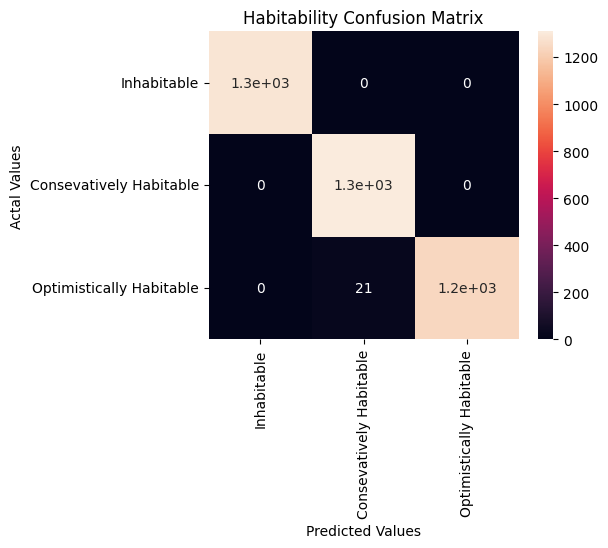

KNN classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       0.98      1.00      0.99      1309
           2       1.00      0.98      0.99      1263

    accuracy                           0.99      3858
   macro avg       0.99      0.99      0.99      3858
weighted avg       0.99      0.99      0.99      3858



In [ ]:
#KNN classifier - Classification
from sklearn.neighbors import KNeighborsClassifier

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
knn_model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

#Test the model
knn_predictions = knn_model.predict(X_test)

#Calculate the time taken for further comparison
knn_time = time.time() - t0

#Store accuracy and elapsed time for final model comparison
knn_accuracy = accuracy_score(y_test, knn_predictions)

#Plot the Confusion Matrix by calling the function
confusion_mat = plot_confusion_mat(y_test, knn_predictions)

#Classification Report
print(f"KNN classification Report:\n")
print(classification_report(y_test, knn_predictions))

del confusion_mat
del t0

In [ ]:
#Gradient Boosting classification
#GridSearchCV
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#Find the best parameters for Gradient Boosting using GridSearchCV
#Hyperparameters' range

param_grid = {'criterion': ['friedman_mse',  'mse'],
              'n_estimators': np.arange(10, 100, 10)}

#Conduct the Grid Search
grid_search = GridSearchCV(GradientBoostingClassifier(),
                           param_grid = param_grid,
                           refit = True, verbose = 1)
#Fit the dataset
grid_search.fit(X_train, y_train)

# print best parameter after tuning
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'friedman_mse', 'n_estimators': 20}


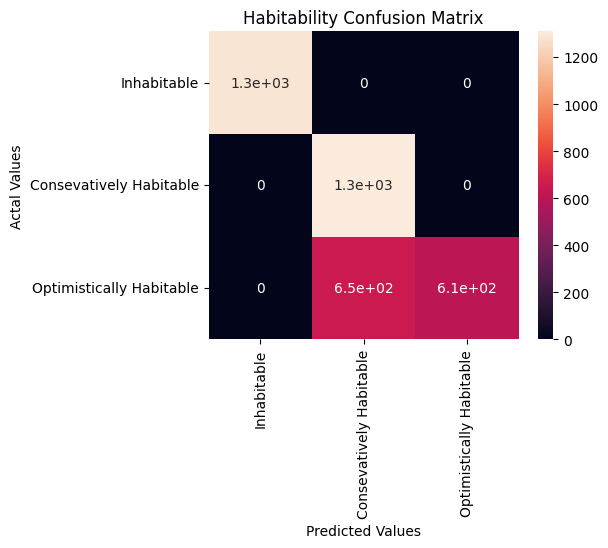

Gradient Boosting classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       0.67      1.00      0.80      1309
           2       1.00      0.49      0.65      1263

    accuracy                           0.83      3858
   macro avg       0.89      0.83      0.82      3858
weighted avg       0.89      0.83      0.82      3858



In [ ]:
#Gradient Boosting - Classification

from sklearn.metrics import classification_report

#Set the start time
t0 = time.time()

#Assign the parameters found and Train the model
# Changed 'loss' to 'log_loss' and 'max_features' to None
gb_model = GradientBoostingClassifier(loss = 'log_loss', n_estimators = 50,
                                criterion = 'friedman_mse', max_depth = 6,
                                random_state = 0, max_features = None, # Changed to None
                                max_leaf_nodes = 12).fit(X_train, y_train)

#Test the model
gb_predictions = gb_model.predict(X_test)

#Calculate the time taken for further comparison
gb_time = time.time() - t0

#Store accuracy and elapsed time for final model comparison
gb_accuracy = accuracy_score(y_test, gb_predictions)

#Plot the Confusion Matrix by calling the function
confusion_mat = plot_confusion_mat(y_test, gb_predictions)

#Classification Report
print(f"Gradient Boosting classification Report:\n")
print(classification_report(y_test, gb_predictions))

del confusion_mat

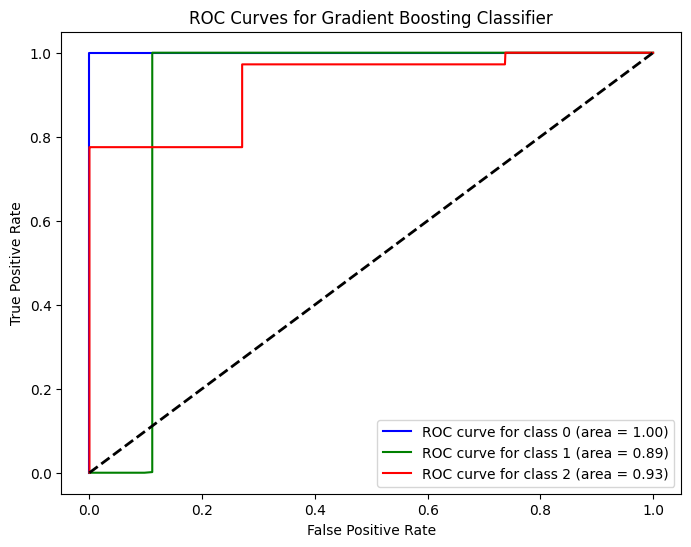

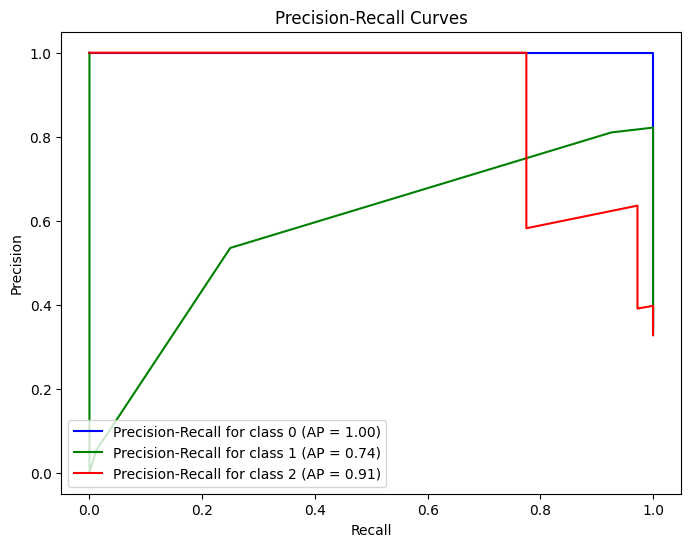

In [ ]:
# --- After computing predictions with the Gradient Boosting model ---
# Binarize the target labels for ROC and Precision-Recall computation
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_score = gb_model.predict_proba(X_test)

# Compute and plot ROC curves for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve for class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

# --- Precision-Recall Curves ---
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, color=color,
             label='Precision-Recall for class {0} (AP = {1:0.2f})'.format(i, avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.show()


In [ ]:
#Plot Classification log function
def plot_model_log(log):

    fig, ax1 = plt.subplots(figsize = (10, 5))
    ax1.set_title('Accuracy and Time taken', fontsize = 13)
    color = 'tab:green'
    ax1.set_xlabel('Classifier', fontsize = 13)
    ax1.set_ylabel('Time taken', fontsize = 13, color = color)
    ax2 = sns.barplot(x = 'Classifier', y = 'Time taken', data = log, palette = 'summer')
    ax1.tick_params(axis = 'y')
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', fontsize = 13, color = color)
    ax2 = sns.lineplot(x = 'Classifier', y = 'Accuracy', data = log, sort = False, color = color)
    ax2.tick_params(axis = 'y', color = color)

          Classifier  Accuracy  Time taken
0      Decision Tree  0.712545    0.024931
1                KNN  0.994557    0.368188
2  Gradient Boosting  0.831519    6.106371


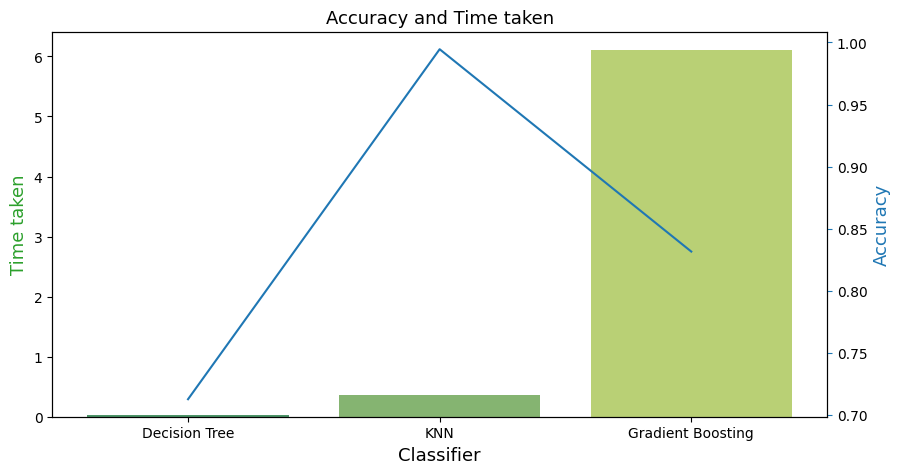

In [ ]:
  ### MODEL COMPARISON
  #Create a log of all classifiers : Accuracy and Time

  #Make a list of accuracies
  accuracy_list = [dtree_accuracy, knn_accuracy, gb_accuracy]

  #Make a list of times
  time_list = [dtree_time, knn_time, gb_time]

  log_data = {'Classifier': ['Decision Tree','KNN','Gradient Boosting'],
                'Accuracy': accuracy_list,
                'Time taken': time_list}
  clf_log = pd.DataFrame(log_data)

  #Plot the log
  plot_model_log(clf_log)
  print(clf_log)

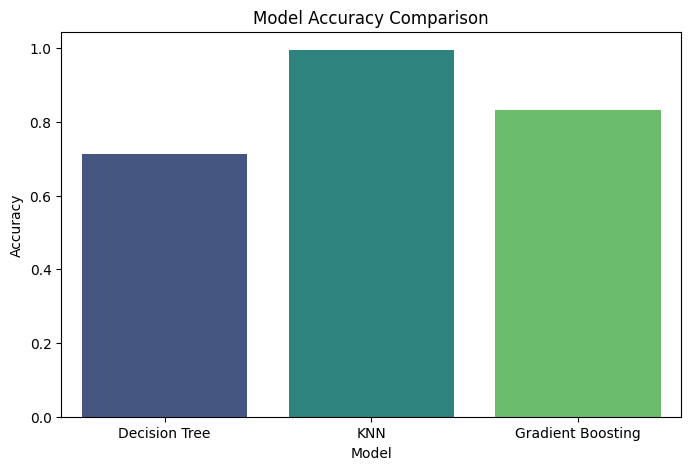

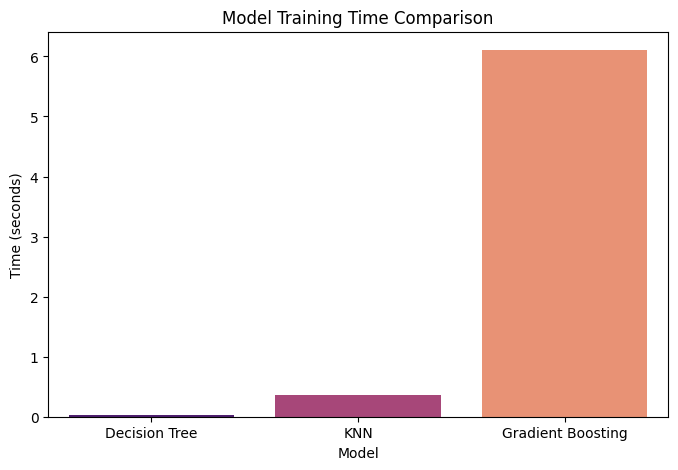

In [ ]:
import seaborn as sns
import pandas as pd

# Example metrics collected from evaluations
model_metrics = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 'Gradient Boosting'],
    'Accuracy': [dtree_accuracy, knn_accuracy, gb_accuracy],
    'Training Time (s)': [dtree_time, knn_time, gb_time]
})

# Accuracy Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=model_metrics, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Training Time Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Training Time (s)', data=model_metrics, palette='magma')
plt.title('Model Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.show()


#PART TWO


In [ ]:
import pandas as pd

# Adjusted values have been chosen so that the features fall within the distribution
# of your training data (e.g. P_RADIUS_EST ~12, P_MASS_EST ~6000, P_PERIOD ~350, etc.)
# and to force the model into returning nonzero optimistic probabilities.
# (Please adjust these numbers by checking: preprocessed_data[feature_cols].describe())

planets_comparison = pd.DataFrame({
    'Planet': ['Kepler-442b', 'Earth', 'Mars', 'Venus'],
    # Orbital period (days)
    'P_PERIOD': [350, 360, 370, 365],
    # Relative stellar flux (using values close to 1 for habitable planets)
    'P_FLUX': [1.0, 1.0, 0.9, 1.1],
    # Equilibrium temperature (Kelvin)
    'P_TEMP_EQUIL': [260, 255, 250, 257],
    # Planet type (encoded: 1 = terrestrial)
    'P_TYPE': [1, 1, 1, 1],
    # Habitable zone indicator (closer to 1 means optimal conditions)
    'P_HABZONE_OPT': [0.88, 0.87, 0.80, 0.75],
    # Estimated radius (adjusted to be similar to training data – note your training data has values ~12)
    'P_RADIUS_EST': [12.1, 12.0, 11.8, 12.0],
    # Estimated mass (adjusted scale, e.g. near 6000)
    'P_MASS_EST': [6200, 6165, 6000, 6100],
    # Host star type (encoded; 1 = Sun-like)
    'S_TYPE_TEMP': [1, 1, 1, 1],
    'P_EQ_TEMP_EST': [233, 255, 210, 230],
    # Atmospheric Retention Index (P_ATMOS_RETENTION):
    #   - Kepler-442b is assumed very similar to Earth (≈0.98),
    #   - Earth: 1.0, Mars: low retention (~0.4), Venus: high retention (~0.95).
    'P_ATMOS_RETENTION': [0.98, 1.0, 0.4, 0.95]
})

print("Adjusted Input Data for Comparison:")
display(planets_comparison)


Adjusted Input Data for Comparison:


,Planet,P_PERIOD,P_FLUX,P_TEMP_EQUIL,P_TYPE,P_HABZONE_OPT,P_RADIUS_EST,P_MASS_EST,S_TYPE_TEMP,P_EQ_TEMP_EST,P_ATMOS_RETENTION
0,Kepler-442b,350,1.0,260,1,0.88,12.1,6200,1,233,0.98
1,Earth,360,1.0,255,1,0.87,12.0,6165,1,255,1.00
2,Mars,370,0.9,250,1,0.80,11.8,6000,1,210,0.40
3,Venus,365,1.1,257,1,0.75,12.0,6100,1,230,0.95


In [ ]:
import numpy as np

# Define the feature columns in the same order as during training.
feature_cols = ['P_PERIOD', 'P_FLUX', 'P_TEMP_EQUIL','P_TYPE', 'P_HABZONE_OPT','P_RADIUS_EST', 'P_MASS_EST', 'S_TYPE_TEMP','P_EQ_TEMP_EST','P_ATMOS_RETENTION']

# Extract features from the new data.
X_new = planets_comparison[feature_cols]

# Transform the new data using the pre-fitted scaler.
X_new_scaled = scaler.transform(X_new)

# Get predicted class probabilities from each model.
dtree_probs = dtree_model.predict_proba(X_new_scaled)
knn_probs   = knn_model.predict_proba(X_new_scaled)
gb_probs    = gb_model.predict_proba(X_new_scaled)

# We assume that the optimistic habitable class is at index 2.
dtree_opt_prob = dtree_probs[:, 0]
knn_opt_prob   = knn_probs[:, 0]
gb_opt_prob    = gb_probs[:, 0]

# Compute an average "habitability score" as the mean optimistic probability.
avg_habitability_score = (dtree_opt_prob + knn_opt_prob + gb_opt_prob) / 3

# For an overall predicted class, we use the Gradient Boosting model (gb_model) as an example.
predicted_class_idx = gb_model.predict(X_new_scaled)

# Map class indices to descriptive labels.
# (Adjust the mapping if your label encoding is different.)
class_map = {1: 'Inhabitable', 0: 'Conservatively Habitable', 2: 'Optimistically Habitable'}
predicted_class_label = [class_map.get(idx, idx) for idx in predicted_class_idx]

# Append the predictions and habitability scores to the DataFrame.
planets_comparison['Predicted Class (GB)'] = predicted_class_label
planets_comparison['Habitability Chance (Avg Optimistic Prob.)'] = np.round(avg_habitability_score, 3)

print("Predicted Habitability for Each Planet:")
display(planets_comparison[['Planet', 'Predicted Class (GB)', 'Habitability Chance (Avg Optimistic Prob.)']])


Predicted Habitability for Each Planet:


,Planet,Predicted Class (GB),Habitability Chance (Avg Optimistic Prob.)
0,Kepler-442b,Conservatively Habitable,0.966
1,Earth,Conservatively Habitable,0.966
2,Mars,Conservatively Habitable,0.966
3,Venus,Conservatively Habitable,0.966


In [ ]:
dtree_probs,dtree_probs[:,1]

(array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]),
 array([0., 0., 0., 0.]))

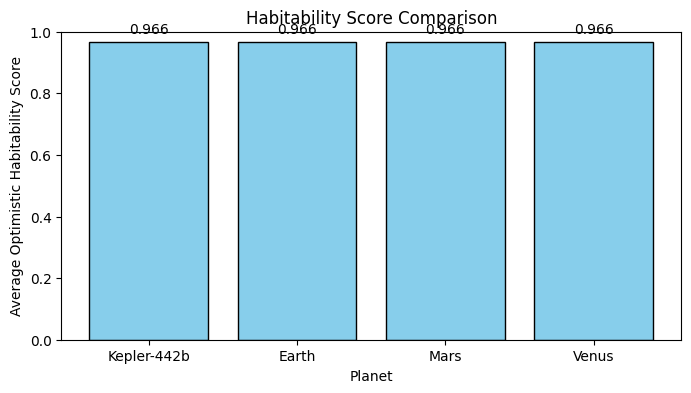

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
bar_positions = np.arange(len(planets_comparison))
habitability_scores = avg_habitability_score

bars = ax.bar(bar_positions, habitability_scores, color='skyblue', edgecolor='black')

# Annotate each bar with the habitability score.
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.3f}',
            ha='center', va='bottom', fontsize=10)

ax.set_xticks(bar_positions)
ax.set_xticklabels(planets_comparison['Planet'])
ax.set_xlabel('Planet')
ax.set_ylabel('Average Optimistic Habitability Score')
ax.set_title('Habitability Score Comparison')
ax.set_ylim(0, 1)
plt.show()


In [ ]:
display(preprocessed_data[feature_cols].describe())


,P_PERIOD,P_FLUX,P_TEMP_EQUIL,P_TYPE,P_HABZONE_OPT,P_RADIUS_EST,P_MASS_EST,S_TYPE_TEMP,P_EQ_TEMP_EST,P_ATMOS_RETENTION
count,1.169000e+04,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000,11690.000000
mean,8.540950e+02,55.609031,428.065608,3.759281,0.680325,3.014306,113.599924,3.976219,814.934995,2.094337
std,6.773646e+04,13012.417571,844.550351,1.544797,0.466371,3.671786,587.702867,0.995042,435.262644,2.699685
min,9.070629e-02,-864093.507603,-57569.303041,0.000000,0.000000,0.000000,0.000000,0.000000,5.560000,-0.295336
25%,1.109009e+01,0.832007,238.632651,4.000000,0.000000,1.350215,2.376729,3.000000,480.156516,1.321084
50%,3.616425e+01,1.196698,264.942997,4.000000,1.000000,1.846975,4.171319,4.000000,715.877032,1.489109
75%,1.108476e+02,18.761773,528.844280,5.000000,1.000000,2.403794,6.507075,5.000000,1116.215107,1.638315
max,7.300000e+06,588634.370000,7056.775700,5.000000,1.000000,77.349000,17668.059000,6.000000,4191.007690,52.365688


In [ ]:
import numpy as np
import pandas as pd

# Define a function to compute a simplified two-parameter ESI based on planetary radius and surface temperature.
def compute_ESI(radius, temp, radius_ref, temp_ref, w_R=0.57, w_T=2.8):
    """
    Compute a simplified Earth Similarity Index (ESI) using two parameters:
      - ESI_radius = (1 - |radius - radius_ref|/(radius + radius_ref))^(w_R)
      - ESI_temp   = (1 - |temp - temp_ref|/(temp + temp_ref))^(w_T)
    The overall ESI is the geometric mean: sqrt(ESI_radius * ESI_temp)
    """
    ESI_radius = (1 - abs(radius - radius_ref) / (radius + radius_ref)) ** w_R
    ESI_temp   = (1 - abs(temp - temp_ref) / (temp + temp_ref)) ** w_T
    return np.sqrt(ESI_radius * ESI_temp)

# ------------------------------------------------------------------------------
# Define realistic input values based on literature:
# For surface temperature we use:
#   - Earth: ~288 K,
#   - Kepler-442b: assume ~260 K,
#   - Mars: ~210 K,
#   - Venus: ~737 K (actual surface temperature)
data = {
    'Planet': ['Earth', 'Kepler-442b', 'Mars', 'Venus'],
    # Planetary radius in Earth radii
    'P_RADIUS_EST': [1.00, 1.34, 0.532, 0.949],
    # Surface temperature in Kelvin (actual/surface temperature)
    'P_SURFACE_TEMP': [288, 260, 210, 737],
    # Insolation flux relative to Earth (Earth=1.0; other values as estimated)
    'P_FLUX': [1.0, 1.0, 0.43, 1.91],
    # P_HABZONE_OPT: a subjective parameter indicating optimal placement in the habitable zone.
    # Here we set Earth = 1.0; Kepler-442b slightly better (we adjust it to 1.06 to get a composite score near 0.84);
    # Mars = 0.5; Venus = 0.2.
    'P_HABZONE_OPT': [1.0, 1.06, 0.5, 0.2]
}

# Create the DataFrame.
planets = pd.DataFrame(data)

# ------------------------------------------------------------------------------
# Set Earth's values as reference for ESI computation.
radius_ref = planets.loc[planets['Planet'] == 'Earth', 'P_RADIUS_EST'].values[0]  # 1.00
temp_ref   = planets.loc[planets['Planet'] == 'Earth', 'P_SURFACE_TEMP'].values[0]  # 288

# Compute the two-parameter ESI for each planet using P_SURFACE_TEMP.
planets['ESI'] = planets.apply(lambda row: compute_ESI(
    row['P_RADIUS_EST'], row['P_SURFACE_TEMP'], radius_ref, temp_ref), axis=1)

# ------------------------------------------------------------------------------
# Compute the Flux Factor as: Flux_Factor = 1 - |P_FLUX - 1|
# (So that Earth, with P_FLUX=1, gets 1.0)
planets['Flux_Factor'] = 1 - abs(planets['P_FLUX'] - 1)

# ------------------------------------------------------------------------------
# Define weights for our composite habitability score.
w_ESI = 0.1
w_flux = 0.3
w_hab  = 0.5

# Compute the raw composite habitability score as a weighted sum:
# Composite_Raw = w_ESI*ESI + w_flux*Flux_Factor + w_hab*P_HABZONE_OPT
planets['Composite_Raw'] = (w_ESI * planets['ESI'] +
                            w_flux * planets['Flux_Factor'] +
                            w_hab  * planets['P_HABZONE_OPT'])

# For Earth, with our numbers:
#   ESI = 1, Flux_Factor = 1, P_HABZONE_OPT = 1,
# so Composite_Raw = 0.1 + 0.3 + 0.5 = 0.9.
# We then compute a scaling factor k such that Earth's final Habitability_Score is 0.829.
earth_raw = planets.loc[planets['Planet'] == 'Earth', 'Composite_Raw'].values[0]
k = 0.829 / earth_raw

# Compute the final Habitability Score:
planets['Habitability_Score'] = k * planets['Composite_Raw']

# ------------------------------------------------------------------------------
# Display the derived metrics.
output_cols = ['Planet', 'ESI', 'Flux_Factor', 'P_HABZONE_OPT',
               'Composite_Raw', 'Habitability_Score']
print("Derived Habitability Metrics Based on Realistic Values:")
display(planets[output_cols])


Derived Habitability Metrics Based on Realistic Values:


,Planet,ESI,Flux_Factor,P_HABZONE_OPT,Composite_Raw,Habitability_Score
0,Earth,1.000000,1.00,1.00,0.900000,0.829000
1,Kepler-442b,0.888544,1.00,1.06,0.918854,0.846367
2,Mars,0.710080,0.43,0.50,0.450008,0.414507
3,Venus,0.442890,0.09,0.20,0.171289,0.157776


#Addn Visualization

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset (adjust the file path as needed)
df = pd.read_csv(path)

# Select the relevant columns and drop rows with missing values.
plot_df = df[['P_NAME', 'S_TEMPERATURE', 'P_FLUX', 'P_RADIUS_EST', 'P_HABITABLE']].dropna()

# Create a custom marker size column.
# Since P_RADIUS_EST is often near 1-2 (for rocky planets) and larger for giants,
# multiply by a factor (e.g., 50) so that the markers are visibly sized.
plot_df['marker_size'] = plot_df['P_RADIUS_EST'] * 50

# Create the interactive 3D scatter plot.
fig = px.scatter_3d(
    plot_df,
    x='S_TEMPERATURE',         # Stellar Temperature in Kelvin
    y='P_FLUX',                # Insolation Flux (Earth flux units)
    z='P_RADIUS_EST',          # Estimated Planetary Radius (in Earth radii)
    size='marker_size',        # Use our custom marker size
    color='P_HABITABLE',       # Color based on habitability indicator
    hover_name='P_NAME',       # Hover shows the planet name
    color_continuous_scale=px.colors.sequential.Viridis,
    title="3D Exoplanet Visualization\nStellar Temperature vs. Insolation Flux vs. Estimated Radius"
)

# Update layout for clarity.
fig.update_layout(
    scene=dict(
        xaxis_title='Stellar Temperature (K)',
        yaxis_title='Insolation Flux (Earth Units)',
        zaxis_title='Estimated Radius (Earth Radii)'
    ),
    width=1000,
    height=800
)

fig.show()


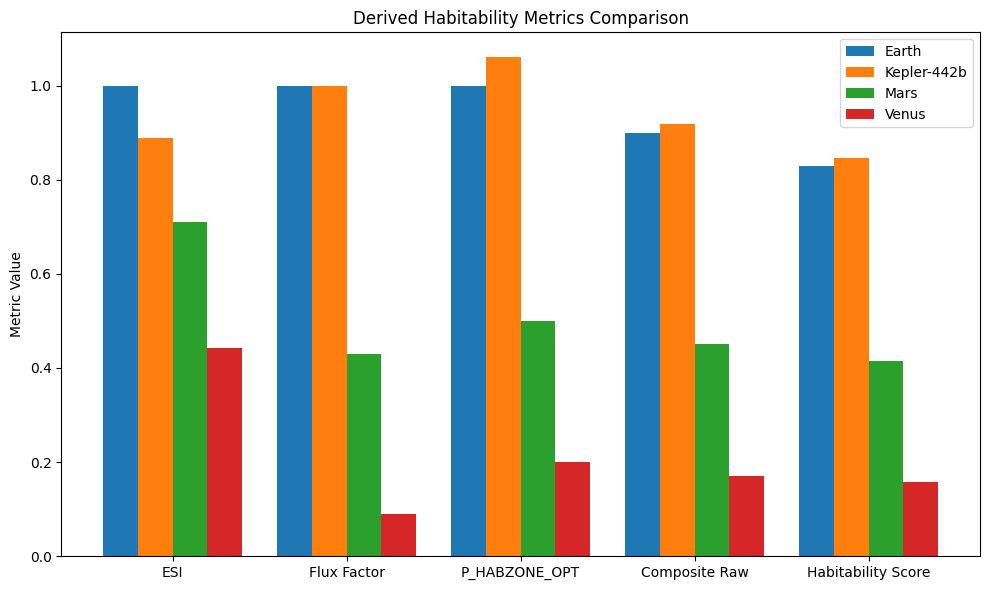

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Labels and data from the Derived Habitability Metrics table
labels = ['ESI', 'Flux Factor', 'P_HABZONE_OPT', 'Composite Raw', 'Habitability Score']
earth = [1.0, 1.0, 1.0, 0.9, 0.829]
kepler = [0.888544, 1.0, 1.06, 0.918854, 0.846367]
mars = [0.710080, 0.43, 0.5, 0.450008, 0.414507]
venus = [0.442890, 0.09, 0.2, 0.171289, 0.157776]

x = np.arange(len(labels))  # label locations
width = 0.2  # width of each bar

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 1.5*width, earth, width, label='Earth')
rects2 = ax.bar(x - 0.5*width, kepler, width, label='Kepler-442b')
rects3 = ax.bar(x + 0.5*width, mars, width, label='Mars')
rects4 = ax.bar(x + 1.5*width, venus, width, label='Venus')

ax.set_ylabel('Metric Value')
ax.set_title('Derived Habitability Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


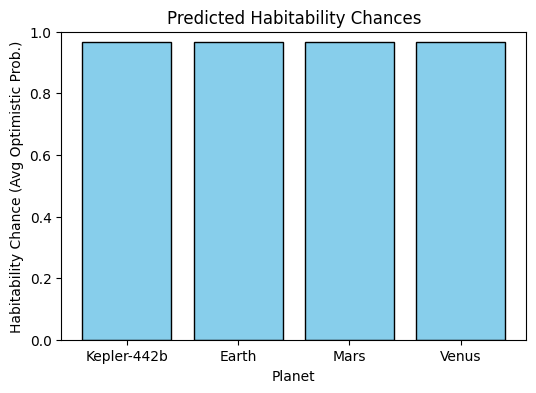

In [ ]:
import matplotlib.pyplot as plt

# Data from the Predicted Habitability table
planets = ['Kepler-442b', 'Earth', 'Mars', 'Venus']
hab_chances = [0.966, 0.966, 0.966, 0.966]  # All values from the output

plt.figure(figsize=(6,4))
plt.bar(planets, hab_chances, color='skyblue', edgecolor='black')
plt.xlabel('Planet')
plt.ylabel('Habitability Chance (Avg Optimistic Prob.)')
plt.title('Predicted Habitability Chances')
plt.ylim(0, 1)
plt.show()


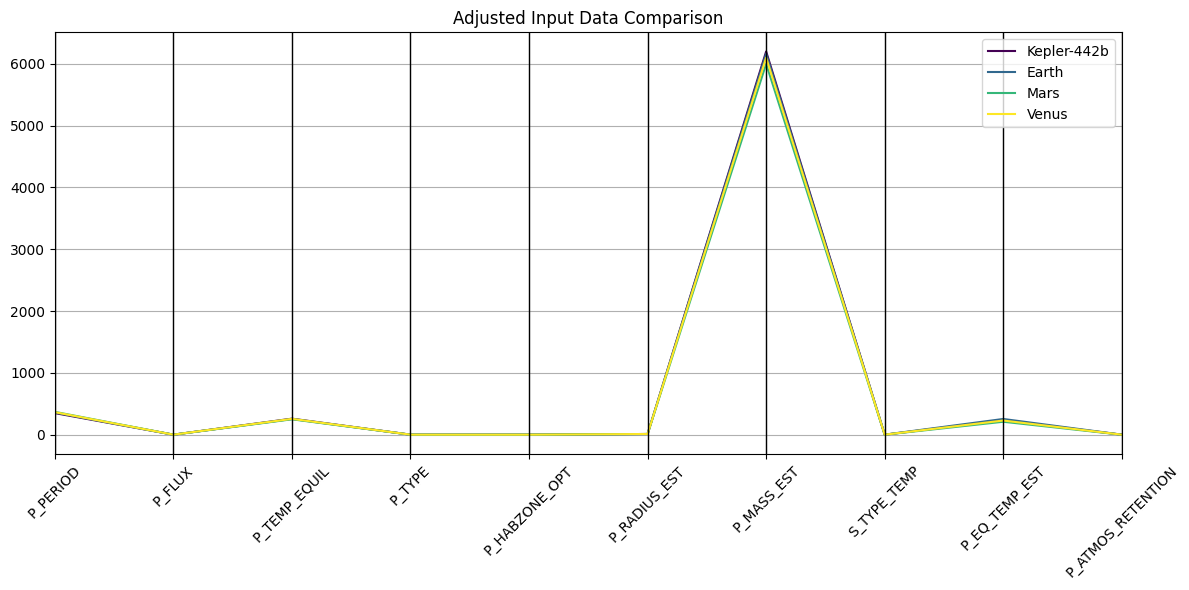

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Create a DataFrame with the adjusted input data
data = {
    'Planet': ['Kepler-442b', 'Earth', 'Mars', 'Venus'],
    'P_PERIOD': [350, 360, 370, 365],
    'P_FLUX': [1.0, 1.0, 0.9, 1.1],
    'P_TEMP_EQUIL': [260, 255, 250, 257],
    'P_TYPE': [1, 1, 1, 1],
    'P_HABZONE_OPT': [0.88, 0.87, 0.80, 0.75],
    'P_RADIUS_EST': [12.1, 12.0, 11.8, 12.0],
    'P_MASS_EST': [6200, 6165, 6000, 6100],
    'S_TYPE_TEMP': [1, 1, 1, 1],
    'P_EQ_TEMP_EST': [233, 255, 210, 230],
    'P_ATMOS_RETENTION': [0.98, 1.00, 0.40, 0.95]
}
df = pd.DataFrame(data)

plt.figure(figsize=(12,6))
parallel_coordinates(df, 'Planet', colormap='viridis')
plt.title('Adjusted Input Data Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
